In [1]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [2]:
%pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import datetime
import plotly.express as px 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import joblib 
import pyarrow

In [4]:
ross_df = pd.read_csv('/Users/swapneelpremchand/Downloads/rossmann-store-sales/train.csv')

/var/folders/v4/yvb3yqbx0jg9p22hslzz7cj00000gn/T/ipykernel_38094/2908181332.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('/Users/swapneelpremchand/Downloads/rossmann-store-sales/train.csv')


In [5]:
test_df = pd.read_csv('/Users/swapneelpremchand/Downloads/rossmann-store-sales/test.csv')

In [6]:
store_df = pd.read_csv('/Users/swapneelpremchand/Downloads/rossmann-store-sales/store.csv')

In [7]:
merged_df = ross_df.merge(store_df , on='Store' , how='left')
merged_df_test = test_df.merge(store_df , on='Store' , how='left')


In [8]:
merged_df.corr(numeric_only=True)

Store  DayOfWeek     Sales  Customers      Open  \
Store                      1.000000  -0.000008  0.005126   0.024325 -0.000047   
DayOfWeek                 -0.000008   1.000000 -0.462125  -0.386445 -0.528963   
Sales                      0.005126  -0.462125  1.000000   0.894711  0.678472   
Customers                  0.024325  -0.386445  0.894711   1.000000  0.616768   
Open                      -0.000047  -0.528963  0.678472   0.616768  1.000000   
Promo                      0.000058  -0.392925  0.452345   0.316169  0.295042   
SchoolHoliday              0.000641  -0.205388  0.085124   0.071568  0.086171   
CompetitionDistance       -0.026413  -0.000025 -0.019229  -0.102861  0.007992   
CompetitionOpenSinceMonth -0.050746   0.000006 -0.028257  -0.030954  0.001384   
CompetitionOpenSinceYear  -0.004592  -0.000025  0.012659   0.008931  0.002771   
Promo2                     0.008488   0.000168 -0.091040  -0.150159 -0.008309   
Promo2SinceWeek            0.009865   0.000174  0.059558   0.040531 -0.002430   
Promo2SinceYear            0.038928   0.000049 -0.021127   0.028974  0.001637   

                              Promo  SchoolHoliday  CompetitionDistance  \
Store                      0.000058       0.000641            -0.026413   
DayOfWeek                 -0.392925      -0.205388            -0.000025   
Sales                      0.452345       0.085124            -0.019229   
Customers                  0.316169       0.071568            -0.102861   
Open                       0.295042       0.086171             0.007992   
Promo                      1.000000       0.067483             0.000138   
SchoolHoliday              0.067483       1.000000            -0.003689   
CompetitionDistance        0.000138      -0.003689             1.000000   
CompetitionOpenSinceMonth -0.000023      -0.000526            -0.061624   
CompetitionOpenSinceYear   0.000152       0.001520             0.025397   
Promo2                    -0.000983      -0.006909            -0.139886   
Promo2SinceWeek           -0.001008      -0.003133            -0.054384   
Promo2SinceYear           -0.000283      -0.003682            -0.109695   

                           CompetitionOpenSinceMonth  \
Store                                      -0.050746   
DayOfWeek                                   0.000006   
Sales                                      -0.028257   
Customers                                  -0.030954   
Open                                        0.001384   
Promo                                      -0.000023   
SchoolHoliday                              -0.000526   
CompetitionDistance                        -0.061624   
CompetitionOpenSinceMonth                   1.000000   
CompetitionOpenSinceYear                   -0.060594   
Promo2                                     -0.009383   
Promo2SinceWeek                            -0.036251   
Promo2SinceYear                             0.050326   

                           CompetitionOpenSinceYear    Promo2  \
Store                                     -0.004592  0.008488   
DayOfWeek                                 -0.000025  0.000168   
Sales                                      0.012659 -0.091040   
Customers                                  0.008931 -0.150159   
Open                                       0.002771 -0.008309   
Promo                                      0.000152 -0.000983   
SchoolHoliday                              0.001520 -0.006909   
CompetitionDistance                        0.025397 -0.139886   
CompetitionOpenSinceMonth                 -0.060594 -0.009383   
CompetitionOpenSinceYear                   1.000000 -0.077336   
Promo2                                    -0.077336  1.000000   
Promo2SinceWeek                           -0.079784       NaN   
Promo2SinceYear                            0.012155       NaN   

                           Promo2SinceWeek  Promo2SinceYear  
Store                             0.009865         0.038928  
DayOfWeek               

In [9]:
px.histogram(merged_df , x = 'DayOfWeek' , y = 'Customers').update_layout(bargap = 0.2)


In [10]:
px.histogram(merged_df , x = 'DayOfWeek' , y = 'Open').update_layout(bargap = 0.2)

In [11]:

def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [12]:
split_date(merged_df)
split_date(merged_df_test)

In [13]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [14]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [15]:
comp_months(merged_df)
comp_months(merged_df_test)

In [16]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [17]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

Date  CompetitionDistance  CompetitionOpenSinceYear  \
803809  2013-07-11                170.0                       NaN   
307313  2014-10-17               3560.0                    2013.0   
350426  2014-09-01                180.0                    2013.0   
422317  2014-06-18               3330.0                    2015.0   
112745  2015-04-21                920.0                    2015.0   
228977  2015-01-07               4970.0                    2015.0   
777767  2013-08-03               2260.0                       NaN   
621459  2013-12-21              22440.0                    2013.0   
554573  2014-02-19               2380.0                    2004.0   
22869   2015-07-11                180.0                    2006.0   
727530  2013-09-17              13530.0                    2013.0   
722927  2013-09-21               3510.0                    2006.0   
1006442 2013-01-10                350.0                       NaN   
484722  2014-04-23               2310.0                    2011.0   
312573  2014-10-11               2330.0                       NaN   
781695  2013-07-31               9680.0                       NaN   
47726   2015-06-19               3290.0                    2007.0   
530155  2014-03-13              20260.0                       NaN   
76682   2015-05-24              21370.0                    2010.0   
384591  2014-07-26                 50.0                    2006.0   

         CompetitionOpenSinceMonth  CompetitionOpen  
803809                         NaN              0.0  
307313                         9.0             13.0  
350426                        11.0             10.0  
422317                         3.0              0.0  
112745                         7.0              0.0  
228977                         7.0              0.0  
777767                         NaN              0.0  
621459                        12.0              0.0  
554573                         7.0            115.0  
22869                         11.0            104.0  
727530                         9.0              0.0  
722927                        11.0             82.0  
1006442                        NaN              0.0  
484722                         9.0             31.0  
312573                         NaN              0.0  
781695                         NaN              0.0  
47726                          1.0            101.0  
530155                         NaN              0.0  
76682                         11.0             54.0  
384591                        11.0             92.0

In [18]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [19]:
promo_cols(merged_df)
promo_cols(merged_df_test)

In [20]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [21]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [22]:
test_inputs = merged_df_test[input_cols].copy()

In [23]:
max_distance = inputs.CompetitionDistance.max()

In [24]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

/var/folders/v4/yvb3yqbx0jg9p22hslzz7cj00000gn/T/ipykernel_38094/751725973.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/v4/yvb3yqbx0jg9p22hslzz7cj00000gn/T/ipykernel_38094/751725973.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [27]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [28]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols].astype(str))
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [31]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols].astype(str))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].astype(str))

In [32]:
inputs

Store  DayOfWeek  Promo StateHoliday  SchoolHoliday StoreType  \
0        0.000000          5    1.0            0            1.0         c   
1        0.000898          5    1.0            0            1.0         a   
2        0.001795          5    1.0            0            1.0         a   
3        0.002693          5    1.0            0            1.0         c   
4        0.003591          5    1.0            0            1.0         a   
...           ...        ...    ...          ...            ...       ...   
1016776  0.611311          2    0.0            a            1.0         b   
1016827  0.657092          2    0.0            a            1.0         b   
1016863  0.689408          2    0.0            a            1.0         b   
1017042  0.850090          2    0.0            a            1.0         b   
1017190  0.983842          2    0.0            a            1.0         b   

        Assortment  CompetitionDistance  CompetitionOpen  Day     Month  Year  \
0                a             0.016482         0.059163  1.0  0.545455   1.0   
1                a             0.007252         0.066378  1.0  0.545455   1.0   
2                a             0.186050         0.074315  1.0  0.545455   1.0   
3                c             0.007911         0.050505  1.0  0.545455   1.0   
4                a             0.394119         0.002165  1.0  0.545455   1.0   
...            ...                  ...              ...  ...       ...   ...   
1016776          a             0.001714         0.054834  0.0  0.000000   0.0   
1016827          b             0.011076         0.114719  0.0  0.000000   0.0   
1016863          b             0.010812         0.000000  0.0  0.000000   0.0   
1017042          b             0.018592         0.000000  0.0  0.000000   0.0   
1017190          b             0.009230         0.093795  0.0  0.000000   0.0   

         WeekOfYear  Promo2  Promo2Open  IsPromo2Month  DayOfWeek_1  \
0          0.588235     0.0    0.000000            0.0          0.0   
1          0.588235     1.0    0.890710            1.0          0.0   
2          0.588235     1.0    0.720856            1.0          0.0   
3          0.588235     0.0    0.000000            0.0          0.0   
4          0.588235     0.0    0.000000            0.0          0.0   
...             ...     ...         ...            ...          ...   
1016776    0.000000     0.0    0.000000            0.0          0.0   
1016827    0.000000     0.0    0.000000            0.0          0.0   
1016863    0.000000     1.0    0.016849            1.0          0.0   
1017042    0.000000     0.0    0.000000            0.0          0.0   
1017190    0.000000     0.0    0.000000            0.0          0.0   

         DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  \
0                0.0          0.0          0.0          1.0          0.0   
1                0.0          0.0          0.0          1.0          0.0   
2                0.0          0.0          0.0          1.0          0.0   
3                0.0          0.0          0.0          1.0          0.0   
4                0.0          0.0          0.0          1.0          0.0   
...              ...          ...          ...          ...          ...   
1016776          1.0          0.0          0.0          0.0          0.0   
1016827          1.0          0.0          0.0          0.0          0.0   
1016863          1.0          0.0          0.0          0.0          0.0   
1017042          1.0          0.0          0.0          0.0          0.0   
1017190          1.0          0.0          0.0          0.0          0.0   

         DayOfWeek_7  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
0                0.0             1.0             0.0             0.0   
1                0.0             1.0             0.0             0.0   
2                0.0             1.0             0.0             0.0   
3                0.0             1.0             0.0        

In [33]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [34]:
from xgboost import XGBRegressor

In [35]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [36]:
%%time
model.fit(X, targets)

CPU times: user 1.72 s, sys: 94 ms, total: 1.82 s
Wall time: 355 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
preds = model.predict(X)

In [38]:
from sklearn.metrics import root_mean_squared_error

In [39]:
error = root_mean_squared_error(preds , targets )

In [40]:
error

2397.161376953125

In [41]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

<Axes: >

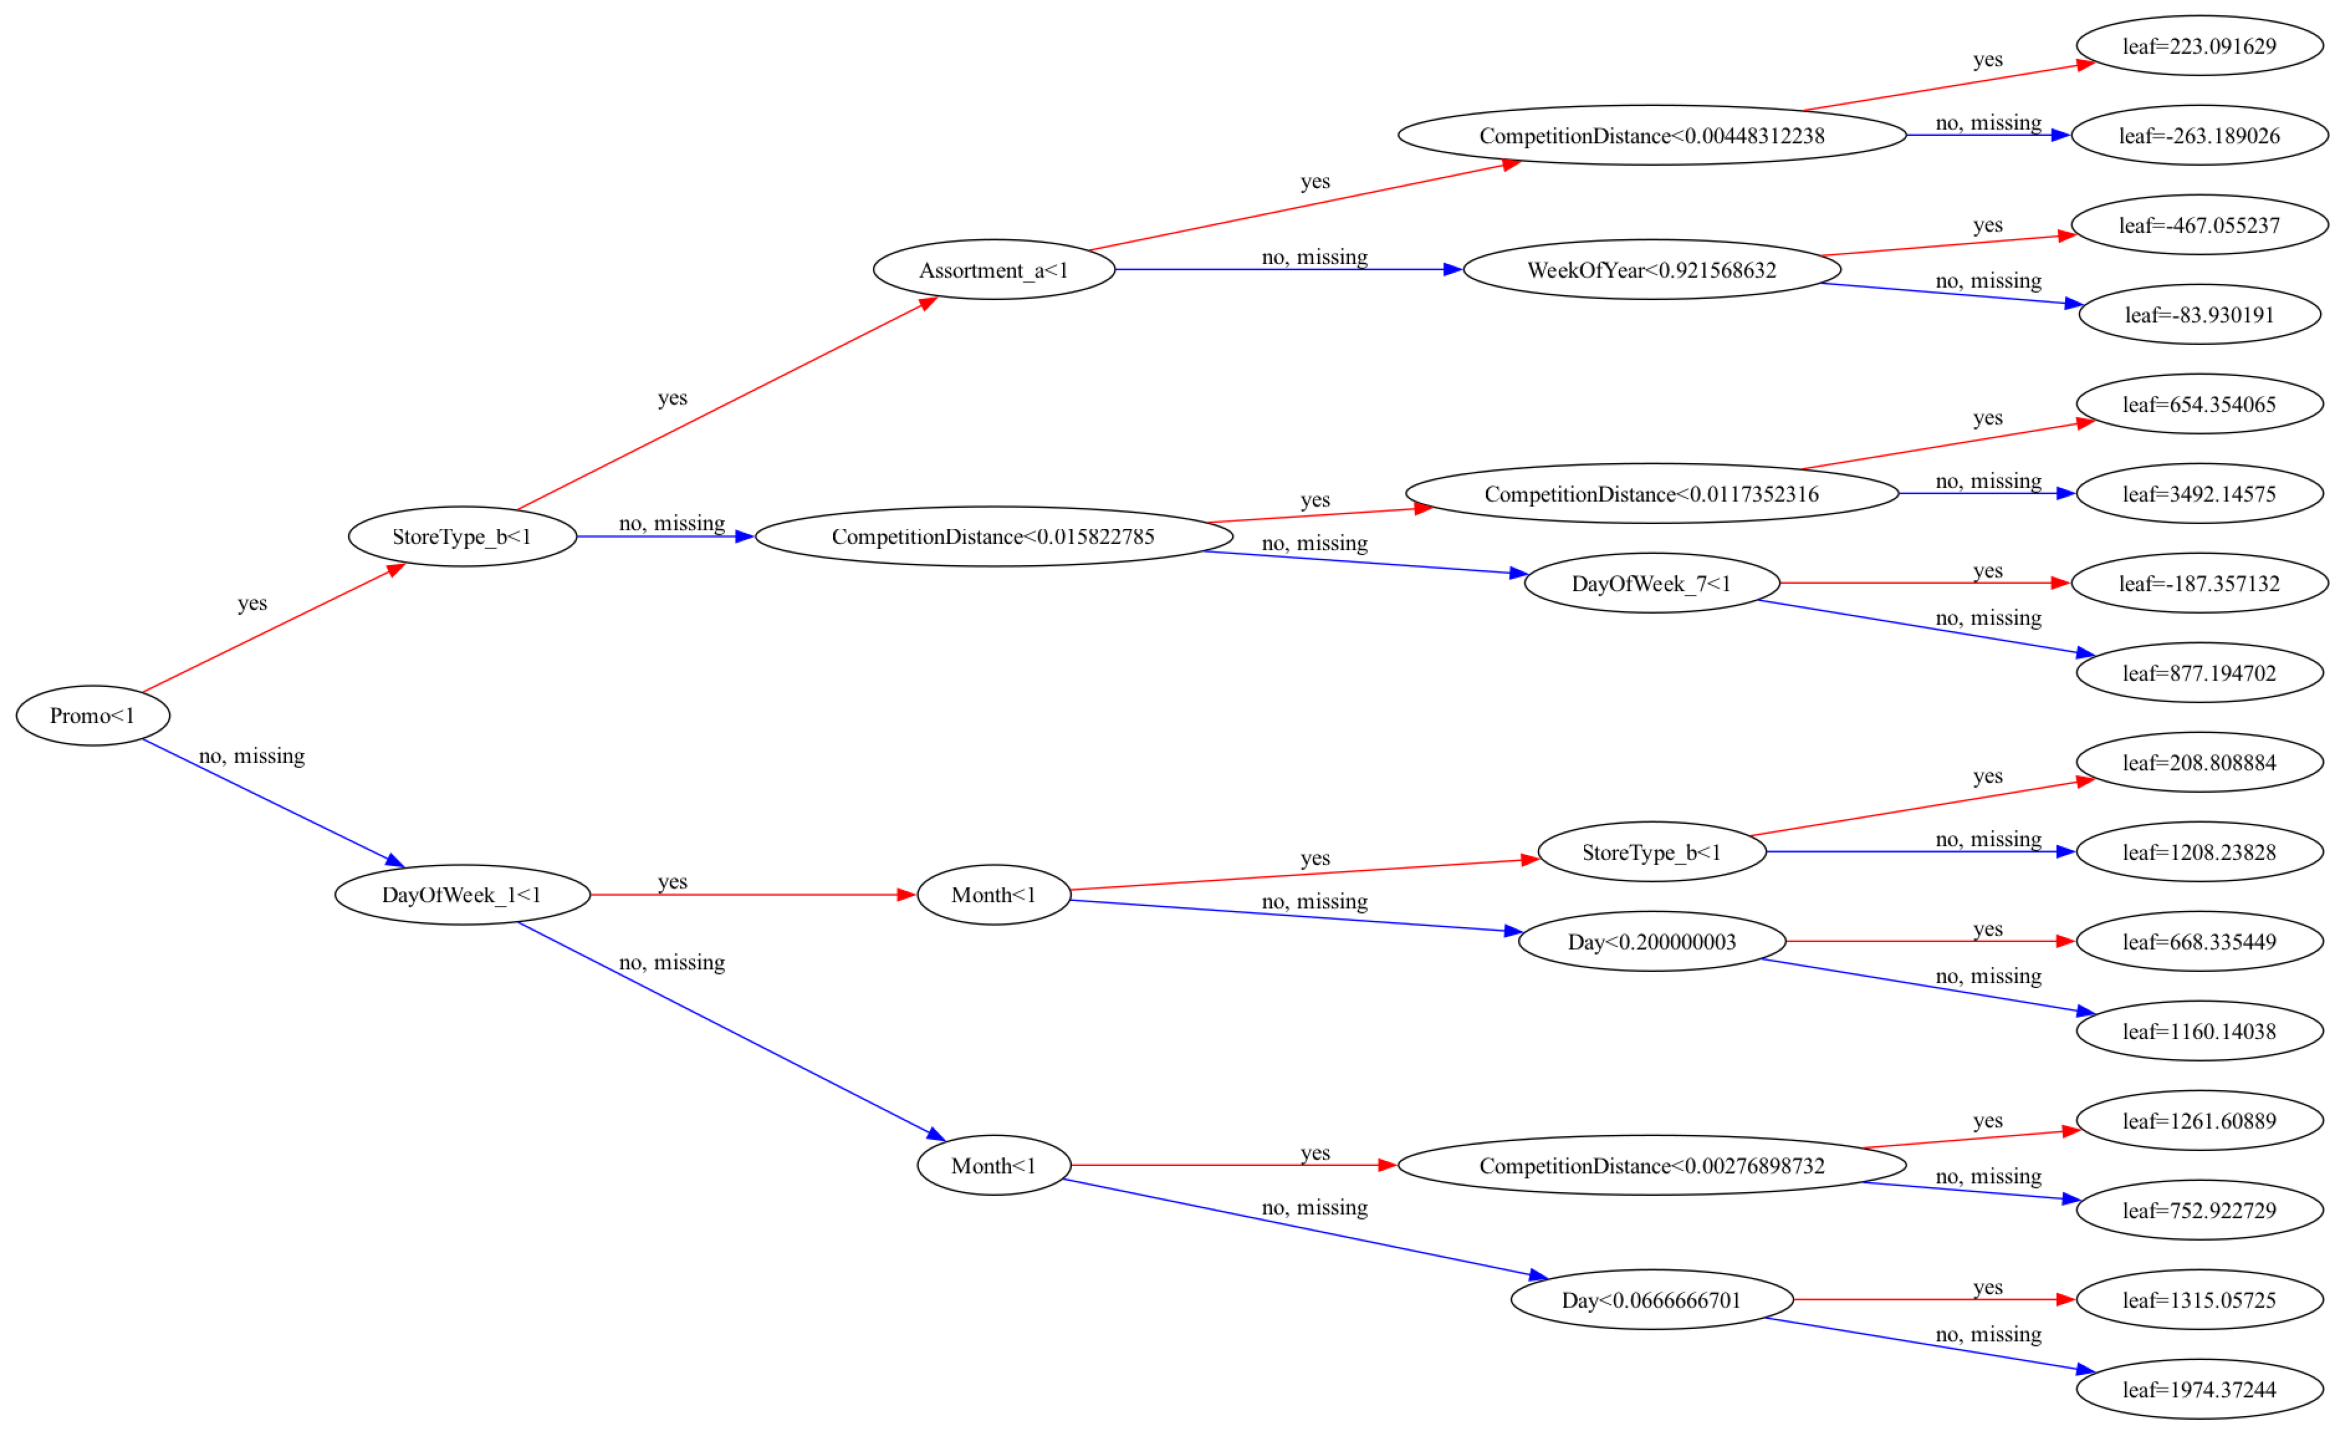

In [42]:
plot_tree(model, rankdir='LR')

In [43]:
#trees as text 

trees = model.get_booster().get_dump()

In [44]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[CompetitionDistance<0.00448312238] yes=15,no=16,missing=16
				15:leaf=223.091629
				16:leaf=-263.189026
			8:[WeekOfYear<0.921568632] yes=17,no=18,missing=18
				17:leaf=-467.055237
				18:leaf=-83.930191
		4:[CompetitionDistance<0.015822785] yes=9,no=10,missing=10
			9:[CompetitionDistance<0.0117352316] yes=19,no=20,missing=20
				19:leaf=654.354065
				20:leaf=3492.14575
			10:[DayOfWeek_7<1] yes=21,no=22,missing=22
				21:leaf=-187.357132
				22:leaf=877.194702
	2:[DayOfWeek_1<1] yes=5,no=6,missing=6
		5:[Month<1] yes=11,no=12,missing=12
			11:[StoreType_b<1] yes=23,no=24,missing=24
				23:leaf=208.808884
				24:leaf=1208.23828
			12:[Day<0.200000003] yes=25,no=26,missing=26
				25:leaf=668.335449
				26:leaf=1160.14038
		6:[Month<1] yes=13,no=14,missing=14
			13:[CompetitionDistance<0.00276898732] yes=27,no=28,missing=28
				27:leaf=1261.60889
				28:leaf=752.9

In [45]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

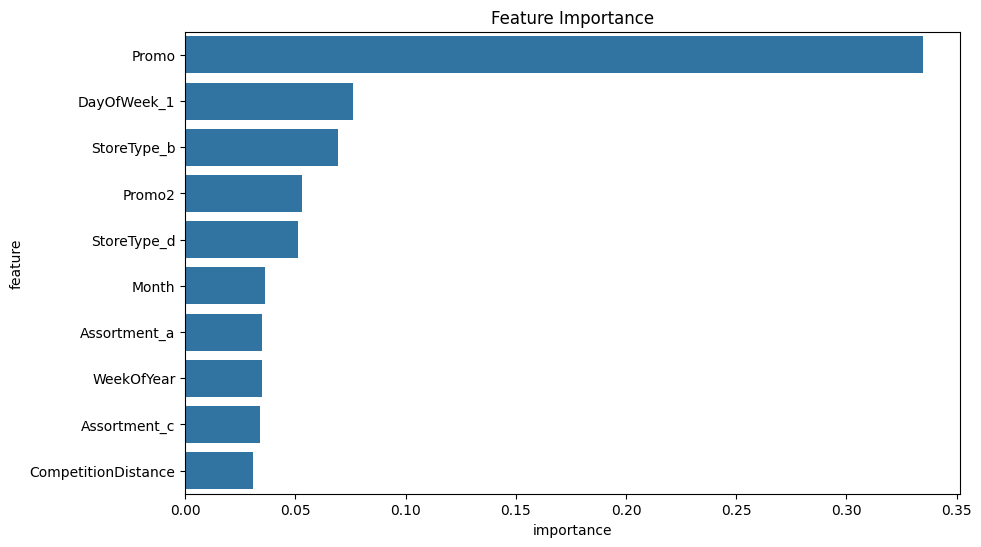

In [46]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [51]:
from sklearn.model_selection import KFold , cross_val_score

In [49]:
kf = KFold(n_splits=5, shuffle= True , random_state= 42 )

In [52]:
score = cross_val_score(model , X , targets , cv=kf , scoring='neg_root_mean_squared_error')

In [54]:
val_score = - score.mean()
print('CV RMSE' , val_score)

CV RMSE 2377.579931640625


In [57]:
def rmse(preds , targs) :
    return root_mean_squared_error(preds , targs)

In [58]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [59]:
kfold = KFold(n_splits=5)

In [60]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2394.787841796875, Validation RMSE: 2462.850341796875
Train RMSE: 2401.158203125, Validation RMSE: 2449.841796875
Train RMSE: 2411.892822265625, Validation RMSE: 2391.591064453125
Train RMSE: 2344.831298828125, Validation RMSE: 2440.04443359375
Train RMSE: 2391.154541015625, Validation RMSE: 2460.874267578125


In [61]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [62]:
preds = predict_avg(models, X)

In [63]:
preds

array([8031.8696, 7536.164 , 8671.131 , ..., 7181.968 , 7955.146 ,
       9629.75  ], dtype=float32)

In [64]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [67]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [90]:
test_params(n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

Train RMSE: 368.8168640136719, Validation RMSE: 652.0484008789062


In [89]:
test_params(max_depth=10 , n_estimators = 250 , learning_rate = 0.3)

Train RMSE: 511.91278076171875, Validation RMSE: 690.3649291992188


In [ ]:
#my best model yet , val rmse = 690.

model = XGBRegressor(n_jobs=-1, 
                     random_state=42, max_depth=10 ,
                     n_estimators = 250 , learning_rate = 0.3)

In [93]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [95]:
%%time
model.fit(X, targets)

CPU times: user 1min 13s, sys: 6.11 s, total: 1min 19s
Wall time: 16.3 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [96]:
test_preds = model.predict(X_test)

In [98]:
rossmanXGB= {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [100]:
joblib.dump(rossmanXGB , 'rossman_xgbmodel')

['rossman_xgbmodel']

In [101]:
submission_df = pd.read_csv('/Users/swapneelpremchand/Downloads/rossmann-store-sales/sample_submission.csv')

In [102]:
submission_df['Sales']  = test_preds

In [103]:
test_df.Open.isna().sum()

np.int64(11)

In [104]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [105]:
submission_df.to_csv('submission.csv', index=None)

In [106]:
from IPython.display import FileLink

In [107]:
# Doesn't work on Colab, use the file browser instead.
FileLink('submission.csv')

/Users/swapneelpremchand/SciKit-Learn/submission.csv